In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def cv_show(title, img):
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Ex 10.1

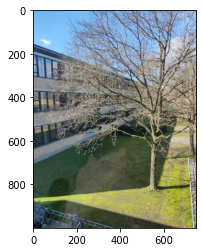

In [3]:
img1 = cv2.imread('./im1.jpeg')
img2 = cv2.imread('./im2.jpeg')
gray1 = cv2.cvtColor(img1.copy(), cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2.copy(), cv2.COLOR_BGR2GRAY)
plt.imshow(img2[:,:,::-1])

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
kp1_img = cv2.drawKeypoints(img1.copy(), kp1, img1.copy(), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
kp2_img = cv2.drawKeypoints(img2.copy(), kp2, img2.copy(), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv_show('kp1_img', kp1_img)
cv_show('kp2_img', kp2_img)

matcher = cv2.BFMatcher()
matches = matcher.knnMatch(des1, des2, k=2)
good = []
for i, j in matches:
    if i.distance/j.distance < 0.7:
        good.append(i)
good_sorted = sorted(good, key=lambda x:x.distance)
match_img = cv2.drawMatches(img1, kp1, img2, kp2, good_sorted[0:50], None, flags=2)
cv_show('Match_img', match_img)

# Ex 10.2

In [4]:
'''
img1 = cv2.imread('./im1.jpeg')
img2 = cv2.imread('./im2.jpeg')
gray1 = cv2.cvtColor(img1.copy(), cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2.copy(), cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
kp1_img = cv2.drawKeypoints(img1.copy(), kp1, img1.copy(), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
kp2_img = cv2.drawKeypoints(img2.copy(), kp2, img2.copy(), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

matcher = cv2.BFMatcher()
matches = matcher.knnMatch(des1, des2, k=2)
good = []
for i, j in matches:
    good.append(i)
'''

matchPoints1 = []
matchPoints2 = []
for m in good:
    matchPoints1.append(kp1[m.queryIdx].pt)
    matchPoints2.append(kp2[m.trainIdx].pt)
matchPoints1 = np.asarray(matchPoints1).astype('float32')
matchPoints2 = np.asarray(matchPoints2).astype('float32')


iterations = 200
criteria = 5.99 * (3**2)
inlierIndex = []
inlierNum = []
for k in range(iterations):
    P1 = []
    P2 = []
    index = np.random.randint(matchPoints1.shape[0], size=4)
    for i in index:
        P1.append(matchPoints1[i])
        P2.append(matchPoints2[i])
    P1 = np.array(P1)
    P1 = np.hstack((P1, np.ones((P1.shape[0], 1))))
    P2 = np.array(P2)
    P2 = np.hstack((P2, np.ones((P2.shape[0], 1))))
    B = []
    for i, j in zip(P1, P2):
        P1_mat = np.array([[0, -1, i[1]], [1, 0, -i[0]], [-i[1], i[0], 0] ])
        b = np.kron(j, P1_mat)
        B.append(b)
    B = np.array(B).reshape(-1, 9)
    U, S, V = np.linalg.svd(B)
    H = V[-1, :].reshape(3,3).T
    
    inlier_num = 0
    index = []
    for idx, (p1, p2) in enumerate(zip(matchPoints1, matchPoints2)):
        p1_esti = H @ np.hstack((p2, 1)).T
        p2_esti = np.linalg.inv(H) @ np.hstack((p1, 1)).T
        p1_esti = p1_esti[0:2]/p1_esti[-1]
        p2_esti = p2_esti[0:2]/p2_esti[-1]
        dist = np.linalg.norm(p1_esti - p1)**2 + np.linalg.norm(p2_esti - p2)**2
        if dist < criteria:
            inlier_num = inlier_num + 1
            index.append(idx)
    inlierIndex.append(index)
    inlierNum.append(inlier_num)
    print('Process:{}/{}'.format(k, iterations))
inlierNum = np.array(inlierNum)
bestIniers_idx = inlierIndex[inlierNum.argmax()]
print('Total Points:{}, Number of inliers:{}'.format(matchPoints1.shape[0], inlierNum.max()))
bestmatches = []
for i in bestIniers_idx:
    bestmatches.append(good[i])
RANSNC_matchImg = cv2.drawMatches(img1, kp1, img2, kp2, bestmatches, None, flags=2)
cv_show('RANSNC_matchImg', RANSNC_matchImg)

Process:0/200
Process:1/200
Process:2/200
Process:3/200
Process:4/200
Process:5/200
Process:6/200
Process:7/200
Process:8/200
Process:9/200
Process:10/200
Process:11/200
Process:12/200
Process:13/200
Process:14/200
Process:15/200
Process:16/200
Process:17/200
Process:18/200
Process:19/200
Process:20/200
Process:21/200
Process:22/200
Process:23/200
Process:24/200
Process:25/200
Process:26/200
Process:27/200
Process:28/200
Process:29/200
Process:30/200
Process:31/200
Process:32/200
Process:33/200
Process:34/200
Process:35/200
Process:36/200
Process:37/200
Process:38/200
Process:39/200
Process:40/200
Process:41/200
Process:42/200
Process:43/200
Process:44/200
Process:45/200
Process:46/200
Process:47/200
Process:48/200
Process:49/200
Process:50/200
Process:51/200
Process:52/200
Process:53/200
Process:54/200
Process:55/200
Process:56/200
Process:57/200
Process:58/200
Process:59/200
Process:60/200
Process:61/200
Process:62/200
Process:63/200
Process:64/200
Process:65/200
Process:66/200
Proce

# Ex 10.3

In [5]:
def normalized_2d(q):
    X = q[0, :]
    Y = q[1, :]
    T = np.array([[1/X.std(), 0, -X.mean()/X.std()], [0, 1/Y.std(), -Y.mean()/Y.std()], [0, 0, 1] ])
    q = T @ q
    return T, q

def SVD_H(P1, P2):
    P1 = np.array(P1)
    P1 = np.hstack((P1, np.ones((P1.shape[0], 1))))
    P2 = np.array(P2)
    P2 = np.hstack((P2, np.ones((P2.shape[0], 1))))
    T1, P1 = normalized_2d(P1.T)
    T2, P2 = normalized_2d(P2.T)
    
    
    B = []
    for i, j in zip(P1.T, P2.T):
        P1_mat = np.array([[0, -1, i[1]], [1, 0, -i[0]], [-i[1], i[0], 0] ])
        b = np.kron(j, P1_mat)
        B.append(b)
    B = np.array(B).reshape(-1, 9)
    U, S, V = np.linalg.svd(B)
    H = V[-1,:].reshape(3,3).T
    H = np.linalg.inv(T1) @ H @ T2
    return H
    

def estiHomographyRANSNC(kp1, des1, kp2, des2):
    matcher = cv2.BFMatcher()
    matches = matcher.knnMatch(des1, des2, k=2)
    good = []
    for i, j in matches:
        if i.distance/j.distance < 0.7:
            good.append(i)
    matchPoints1 = []
    matchPoints2 = []
    for m in good:
        matchPoints1.append(kp1[m.queryIdx].pt)
        matchPoints2.append(kp2[m.trainIdx].pt)
    matchPoints1 = np.asarray(matchPoints1).astype('float32')
    matchPoints2 = np.asarray(matchPoints2).astype('float32')


    iterations = 200
    criteria = 3.84 * (3**2)
    inlierPoints = []
    inlierNum = []
    for k in range(iterations):
        P1 = []
        P2 = []
        index = np.random.randint(matchPoints1.shape[0], size=4)
        for i in index:
            P1.append(matchPoints1[i])
            P2.append(matchPoints2[i])
        H = SVD_H(P1, P2)
    
        inlier_num = 0
        inlier_points = []
        for p1, p2 in zip(matchPoints1, matchPoints2):
            p1_esti = H @ np.hstack((p2, 1)).T
            p2_esti = np.linalg.inv(H) @ np.hstack((p1, 1)).T
            p1_esti = p1_esti[0:2]/p1_esti[-1]
            p2_esti = p2_esti[0:2]/p2_esti[-1]
            dist = np.linalg.norm(p1_esti - p1)**2 + np.linalg.norm(p2_esti - p2)**2
            if dist < criteria:
                inlier_num = inlier_num + 1
                inlier_points.append([p1, p2])
        inlierNum.append(inlier_num)
        inlierPoints.append(inlier_points)
    inlierNum = np.array(inlierNum)
    
    MaxInlierPoints = np.array(inlierPoints[inlierNum.argmax()])
    P1 = []
    P2 = []
    for (p1, p2) in MaxInlierPoints:
        P1.append(p1)
        P2.append(p2)
    H_final = SVD_H(P2, P1)      ## Here We get the Homography from P1 to P2 (rightImg to LeftImg) 
    return H_final
    
    

In [6]:
img1 = cv2.imread('./im1.jpeg')
img2 = cv2.imread('./im2.jpeg')
gray1 = cv2.cvtColor(img1.copy(), cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2.copy(), cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
H = estiHomographyRANSNC(kp1, des1, kp2, des2)
print(H)

[[-3.89650150e-01  8.88631677e-03 -2.61706062e+02]
 [ 1.65116245e-01 -5.86208244e-01 -2.76922004e+01]
 [ 3.52776221e-04 -4.18022663e-06 -6.44137765e-01]]


# Ex 10.4

In [7]:
def warpImage(im, H, xRange, yRange):
    T = np.eye(3)
    T[:2, 2] = [-xRange[0], -yRange[0]]
    H = T @ H
    outSize = (xRange[1] - xRange[0], yRange[1] - yRange[0])
    imWarp = cv2.warpPerspective(im, H, outSize)
    maskWarp = cv2.warpPerspective(np.ones(im.shape[0:2], dtype = np.uint8), H, outSize)
    return imWarp, maskWarp

### Method 1: Do not use mask

In [8]:
img1 = cv2.imread('./im1.jpeg')
img2 = cv2.imread('./im2.jpeg')


xRange1 = [0, img2.shape[1]+img1.shape[1]]
yRange1 = [-img2.shape[0], img1.shape[0]+img2.shape[0]]
img1_Warp, img1_maskWarp = warpImage(img1.copy(), H, xRange1, yRange1)

H_iden = np.eye(3)
xRange2 = [0, img2.shape[1]]
yRange2 = [0, img2.shape[0]]
img2_Warp, img2_maskWarp = warpImage(img2.copy(), H_iden, xRange2, yRange2)

img1_Warp[img2.shape[0]:img2.shape[0]+img2.shape[0], 0:img2.shape[1]] = img2
cv_show('Stitch_Image', img1_Warp)


### Method 2: Use mask

In [9]:
img1 = cv2.imread('./im1.jpeg')
img2 = cv2.imread('./im2.jpeg')


xRange1 = [0, img1.shape[1]+img2.shape[1]]
yRange1 = [-img2.shape[0], img1.shape[0] + img2.shape[0]]
img1_Warp, img1_maskWarp = warpImage(img1, H, xRange1, yRange1)

H_iden = np.eye(3)
xRange2 = [0, img2.shape[1]]
yRange2 = [0, img2.shape[0]]
img2_Warp, img2_maskWarp = warpImage(img2, H_iden, xRange2, yRange2)

for i in range(img2_maskWarp.shape[0]):
    for j in range(img2_maskWarp.shape[1]):
        if img2_maskWarp[i, j] == 1 and img1_maskWarp[i+img2.shape[0], j] == 0:
            img1_Warp[i+img2.shape[0], j, :] = img2_Warp[i, j, :]
cv_show('Stitch_Img', img1_Warp)

In [10]:
img1 = cv2.imread('./im1.jpeg')
img2 = cv2.imread('./im2.jpeg')

H_iden = np.eye(3)
xRange1 = [0, img1.shape[1]]
yRange1 = [0, img1.shape[0]]
img1_Warp, img1_maskWarp = warpImage(img1, H_iden, xRange1, yRange1)


H = np.linalg.inv(H)
xRange2 = [-img1.shape[1], img2.shape[1]]
yRange2 = [-img1.shape[0], img2.shape[0] + img1.shape[0]]
img2_Warp, img2_maskWarp = warpImage(img2, H, xRange2, yRange2)

for i in range(img1_maskWarp.shape[0]):
    for j in range(img1_maskWarp.shape[1]):
        if img1_maskWarp[i, j] == 1 and img2_maskWarp[i+img1.shape[0], j+img2.shape[1]] == 0:
            img2_Warp[i+img1.shape[0], j+img2.shape[1], :] = img1_Warp[i, j, :]
cv_show('Stitch_Img', img2_Warp)